In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = data['Time'].dt.date
daily_totals = data.groupby('Date')['Total'].sum().reset_index()
daily_totals

,Date,Total
0,2017-01-01,209
1,2017-01-02,215
2,2017-01-03,240
3,2017-01-04,246
4,2017-01-05,224
...,...,...
1456,2020-12-27,224
1457,2020-12-28,265
1458,2020-12-29,253
1459,2020-12-30,231


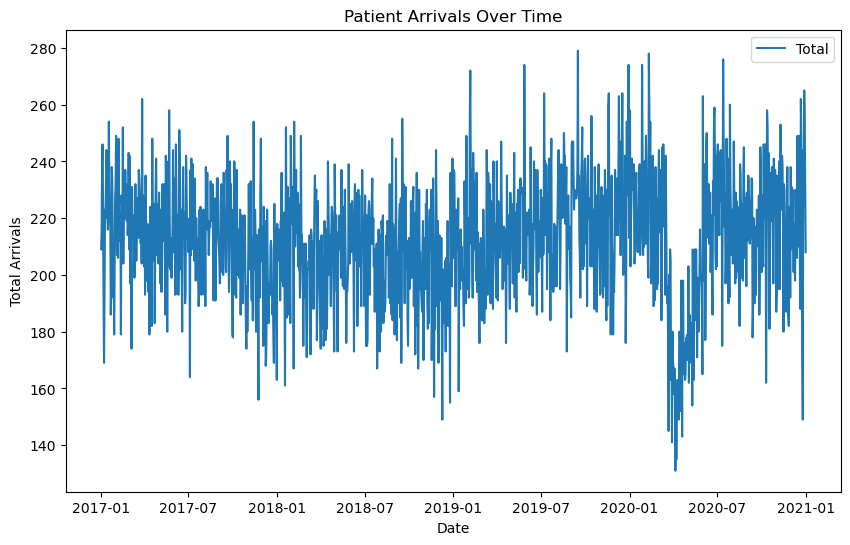

In [4]:
daily_totals.plot(x='Date', y='Total', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrivals')
plt.show()

In [5]:
train_size = int(len(daily_totals) * 0.9)  
train, test = daily_totals.iloc[:train_size], daily_totals.iloc[train_size:]

In [6]:
model = ExponentialSmoothing(train['Total'], seasonal='add', seasonal_periods=7)
fitted_model = model.fit()

In [7]:
forecast_values = fitted_model.forecast(len(test))

In [8]:
forecast_values

1314    219.609313
1315    208.714629
1316    203.904026
1317    239.894182
1318    229.099279
           ...    
1456    203.904026
1457    239.894182
1458    229.099279
1459    224.277343
1460    223.051373
Length: 147, dtype: float64

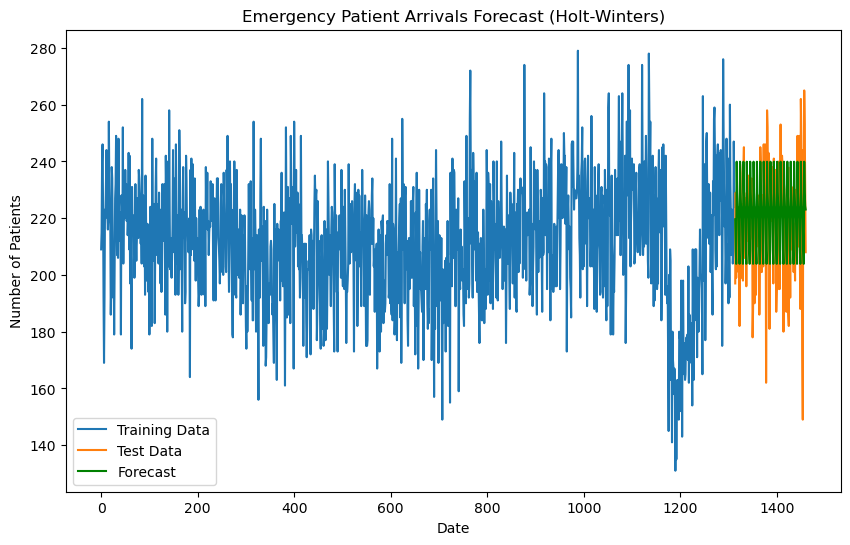

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total'], label='Training Data')
plt.plot(test.index, test['Total'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='green')
plt.title('Emergency Patient Arrivals Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Total'], forecast_values)
print("MAPE:", mape)

MAPE: 6.596321083202161


In [11]:
rmse = np.sqrt(mean_squared_error(test['Total'], forecast_values))
print("RMSE:", rmse)

RMSE: 17.500551568854238


In [12]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['Total'], forecast_values)
print("MAE:", mae)

MAE: 13.732130527554446
